In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [26]:
# 1. 数据准备
torch.manual_seed(42) # 设置随机种子以便复现结果
X = torch.linspace(0, 1, 100).unsqueeze(1)             # (100,1)
y = 2 * X + 3 + 0.1 * torch.randn_like(X)              # y = 2x+3 + 噪声

In [27]:
print(X.shape,'\n',X[0:5])

torch.Size([100, 1]) 
 tensor([[0.0000],
        [0.0101],
        [0.0202],
        [0.0303],
        [0.0404]])


In [28]:
print(y.shape,'\n',y[0:5])

torch.Size([100, 1]) 
 tensor([[3.1927],
        [3.1689],
        [3.1305],
        [2.8501],
        [3.1486]])


In [ ]:
# 2. 模型定义
model = nn.Linear(1, 1) # 线性模型 y = wx + b

In [ ]:
# 3. 损失函数和优化器
criterion = nn.MSELoss() # 均方误差损失函数
optimizer = optim.SGD(model.parameters(), lr=0.1) # 随机梯度下降优化器

In [ ]:
# 4. 训练循环，记录每个 epoch 的损失
num_epochs = 100
losses = []
for epoch in range(1, num_epochs + 1):
    model.train() # 设置模型为训练模式
    optimizer.zero_grad() # 清空梯度
    outputs = model(X) # 前向传播
    loss = criterion(outputs, y) # 计算损失
    loss.backward() # 反向传播
    optimizer.step() # 更新参数
    
    losses.append(loss.item()) # 记录损失
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.1331
Epoch [20/100], Loss: 0.0119
Epoch [30/100], Loss: 0.0111
Epoch [40/100], Loss: 0.0107
Epoch [50/100], Loss: 0.0105
Epoch [60/100], Loss: 0.0103
Epoch [70/100], Loss: 0.0101
Epoch [80/100], Loss: 0.0100
Epoch [90/100], Loss: 0.0099
Epoch [100/100], Loss: 0.0098


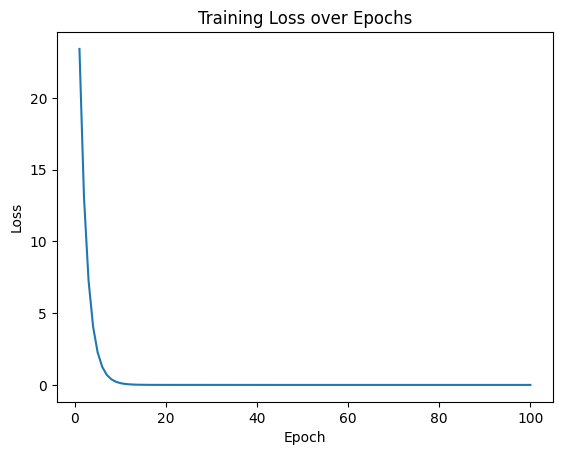

In [32]:
# 5. 可视化训练损失
plt.figure()
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

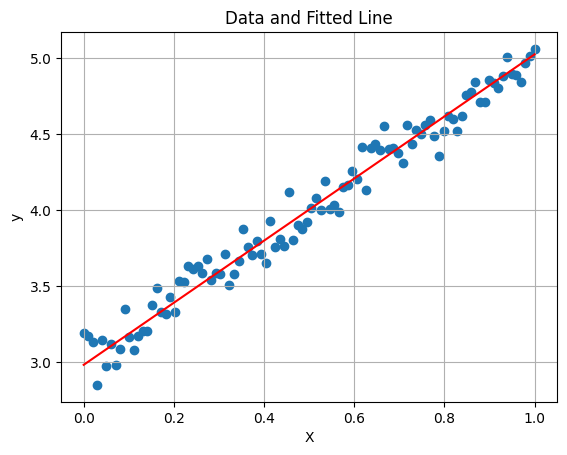

In [ ]:
# 6. 可视化数据点与拟合直线
model.eval() # 设置模型为评估模式
with torch.no_grad(): # 不计算梯度
    predicted = model(X) # 前向传播得到预测值

plt.figure()
plt.scatter(X.numpy(), y.numpy())        # 原始数据点
plt.plot(X.numpy(), predicted.numpy(),color='red')  # 拟合直线
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data and Fitted Line')
plt.show()

In [34]:
# 7. 对新样本进行预测
with torch.no_grad():
    test_X = torch.tensor([[4.0], [7.5]])
    preds = model(test_X)
    for inp, p in zip(test_X, preds):
        print(f'Input: {inp.item():.2f}, Predicted: {p.item():.2f}')

Input: 4.00, Predicted: 11.16
Input: 7.50, Predicted: 18.31
